# Spotify Dataset EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

As required I will handle the set as a CSV file where it will be loaded into the volume already created by Airflow.  
/dags/files/spotify_dataset.csv
 
 

In [2]:
df = pd.read_csv('../dags/files/spotify_dataset.csv')
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [3]:
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


As a first look we can notice that there are values that are between 0 and 1 and also measurement values in different ranges.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

C:\Users\davel\AppData\Local\Temp\ipykernel_20548\3970729915.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=missing_data.index, y=missing_data.values, palette="viridis")


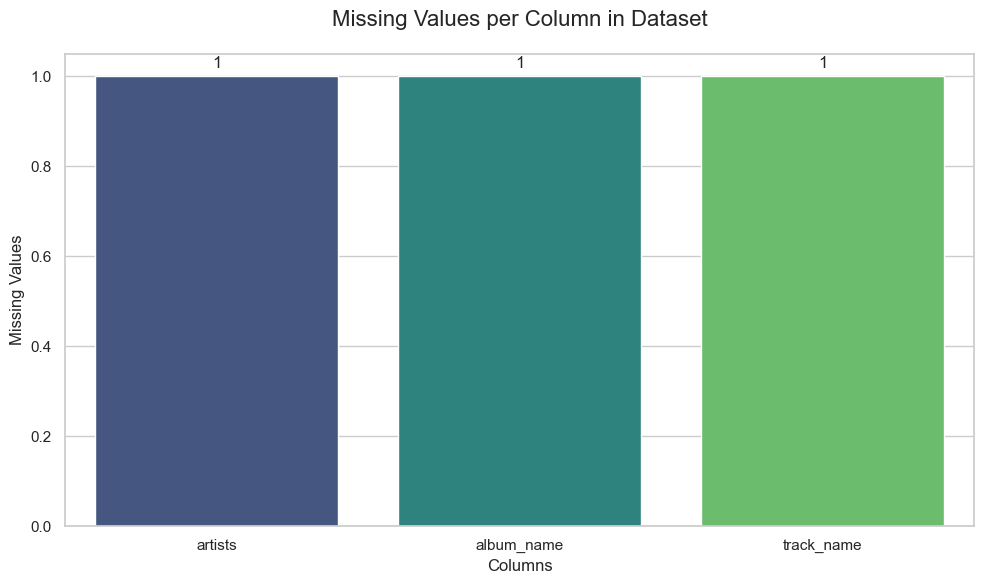

In [5]:
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))

barplot = sns.barplot(x=missing_data.index, y=missing_data.values, palette="viridis")

plt.xlabel('Columns', fontsize=12)
plt.ylabel('Missing Values', fontsize=12)
plt.title('Missing Values per Column in Dataset', fontsize=16, pad=20)

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.tight_layout()
plt.show()

Apparently there is one for each column that seems to be missing, it should not be a problem for our case.

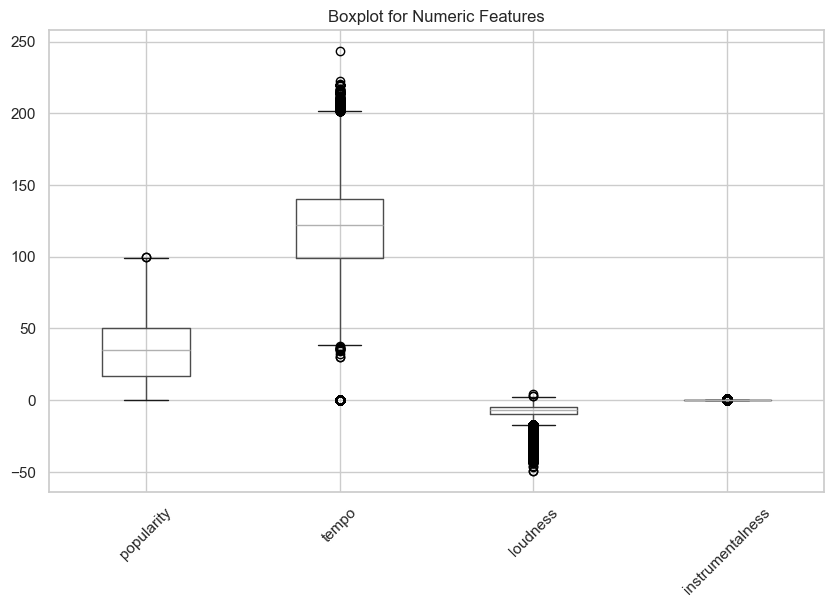

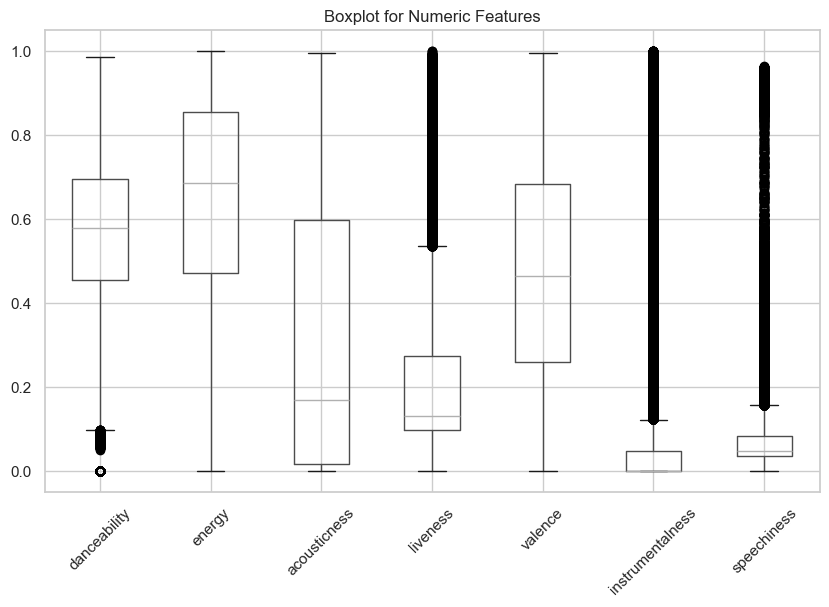

In [6]:
numeric_features = ['danceability', 'energy', 'acousticness', 'liveness', 'valence', 'instrumentalness', 'speechiness']

plt.figure(figsize=(10,6))
df.boxplot(column=['popularity', 'tempo', 'loudness', 'instrumentalness'])
plt.xticks(rotation=45)
plt.title('Boxplot for Numeric Features')
plt.show()

plt.figure(figsize=(10,6))
df.boxplot(column=numeric_features)
plt.xticks(rotation=45)
plt.title('Boxplot for Numeric Features')
plt.show()

I developed two graphs to further identify if we have outliers, however we seem to have variability and distribution of the data is quite situated in some variables, so we could see how those variables are distributed.

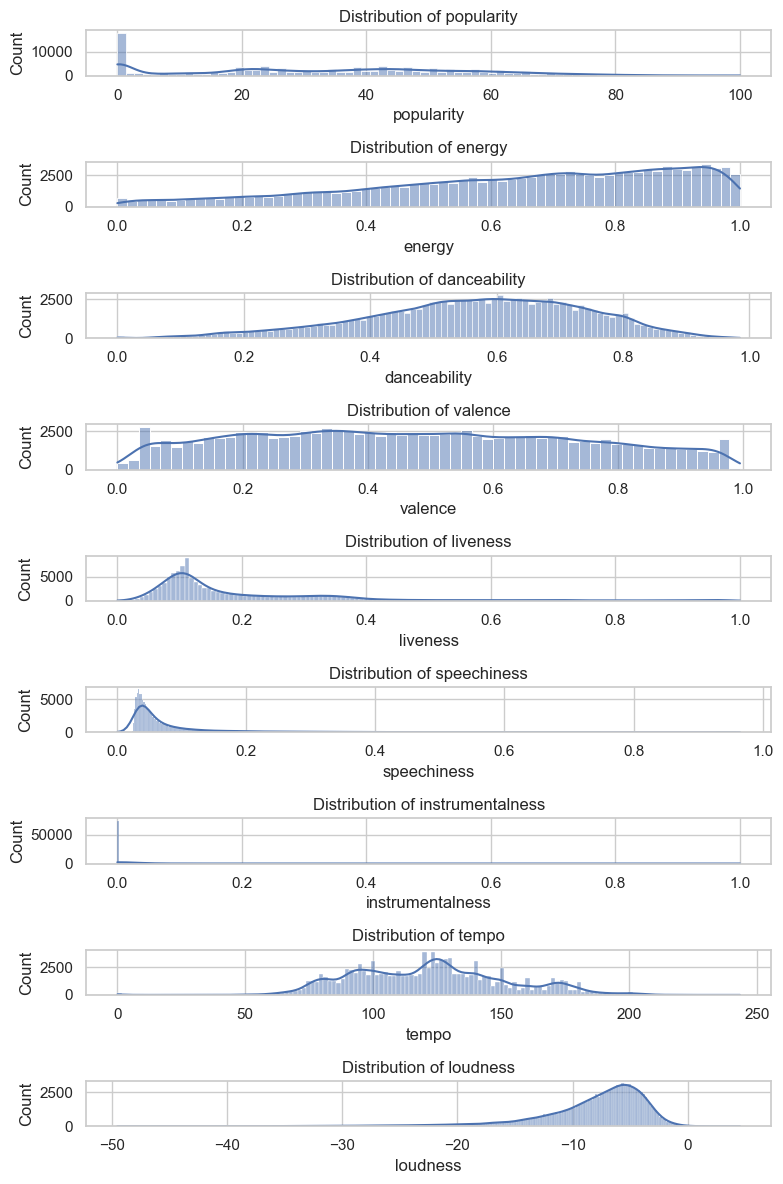

In [7]:
sns.set_theme(style="whitegrid")

columns_to_visualize = ['popularity', 'energy', 'danceability', 'valence', 'liveness', 'speechiness', 'instrumentalness', 'tempo', 'loudness']

fig, axes = plt.subplots(nrows=len(columns_to_visualize), figsize=(8, 12))

for i, col in enumerate(columns_to_visualize):
    sns.histplot(df[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

As expected we can see how the distribution is and how most of the records are concentrated in specific parts of the graph.

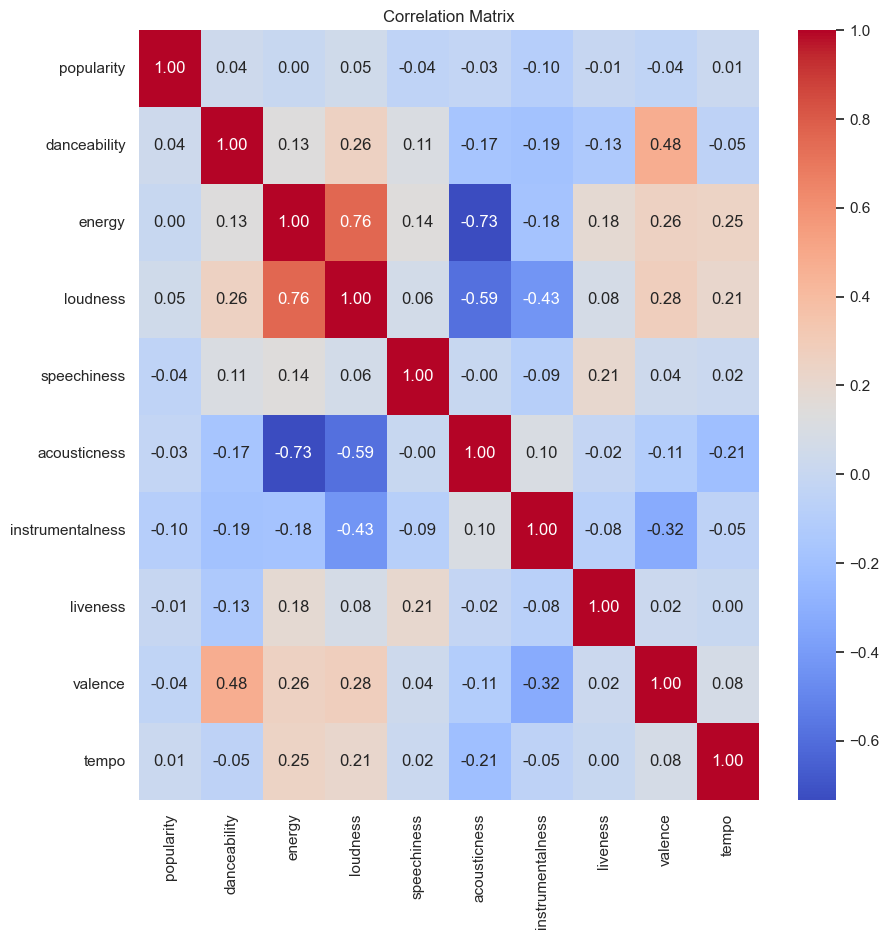

In [8]:
features = ['popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

corr_matrix = df[features].corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


1. The most correlated features are energy and volume, with a correlation coefficient of 0.76, suggesting a strong positive relationship. Conversely, volume and acoustics show a negative correlation of -0.59, and energy and acoustics are even more inversely related at -0.73. This pattern aligns with expectations, as higher energy in a song typically reduces its acoustic elements, while louder volume tends to indicate more energy.

2. Popularity shows only weak correlations with other metrics, which makes sense given that popularity can be influenced by subjective factors such as the artist's fame, release timing, and the musical genre.

3. There is a negative correlation of -0.43 between instrumentality and loudness, likely because songs that are more instrumental are usually quieter. Additionally, a positive correlation of 0.43 between danceability and valence indicates that songs perceived as more positive are often more dance-friendly.

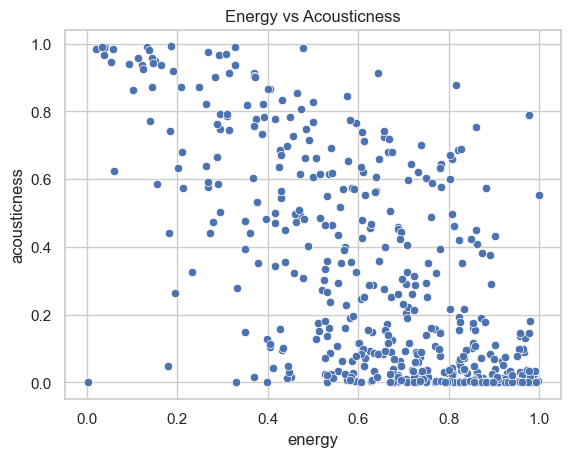

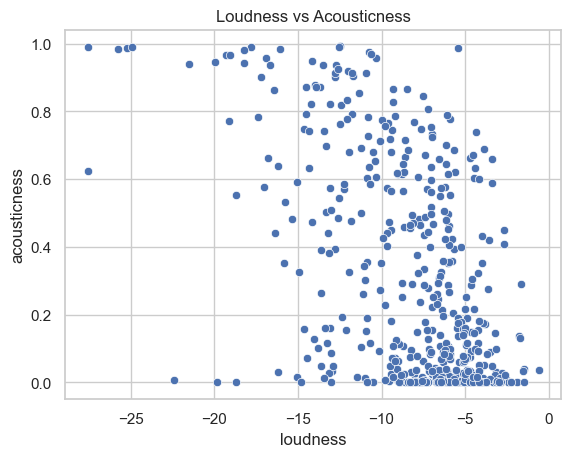

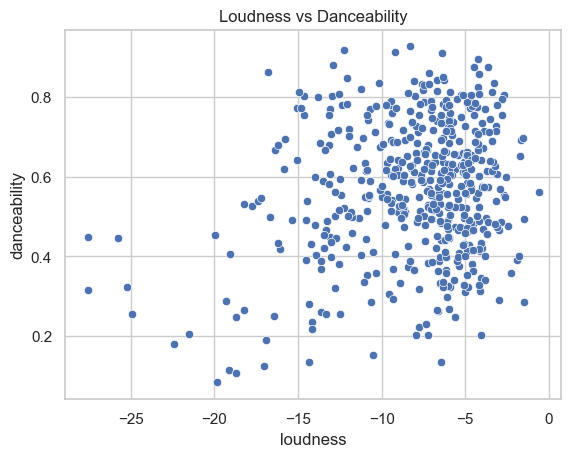

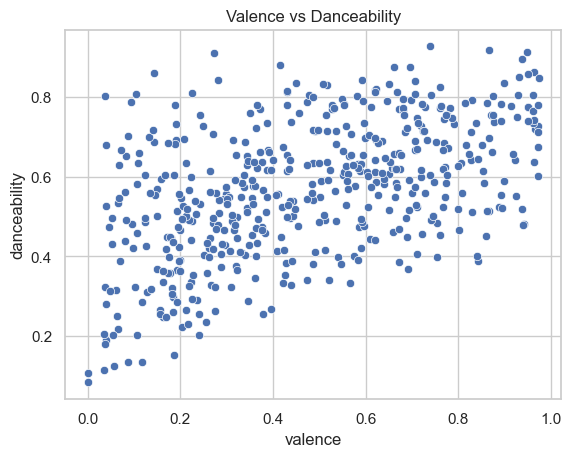

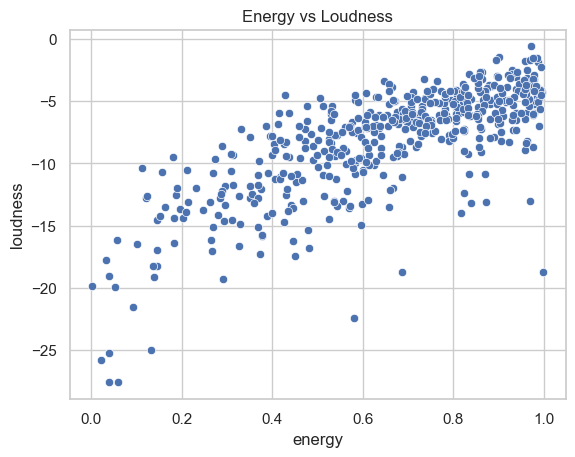

In [9]:
sample_df = df.sample(500)

# Scatter plot para energy vs popularity
sns.scatterplot(data=sample_df, x='energy', y='acousticness')
plt.title('Energy vs Acousticness')
plt.show()

sns.scatterplot(data=sample_df, x='loudness', y='acousticness')
plt.title('Loudness vs Acousticness')
plt.show()

sns.scatterplot(data=sample_df, x='loudness', y='danceability')
plt.title('Loudness vs Danceability')
plt.show()

sns.scatterplot(data=sample_df, x='valence', y='danceability')
plt.title('Valence vs Danceability')
plt.show()


sns.scatterplot(data=sample_df, x='energy', y='loudness')
plt.title('Energy vs Loudness')
plt.show()

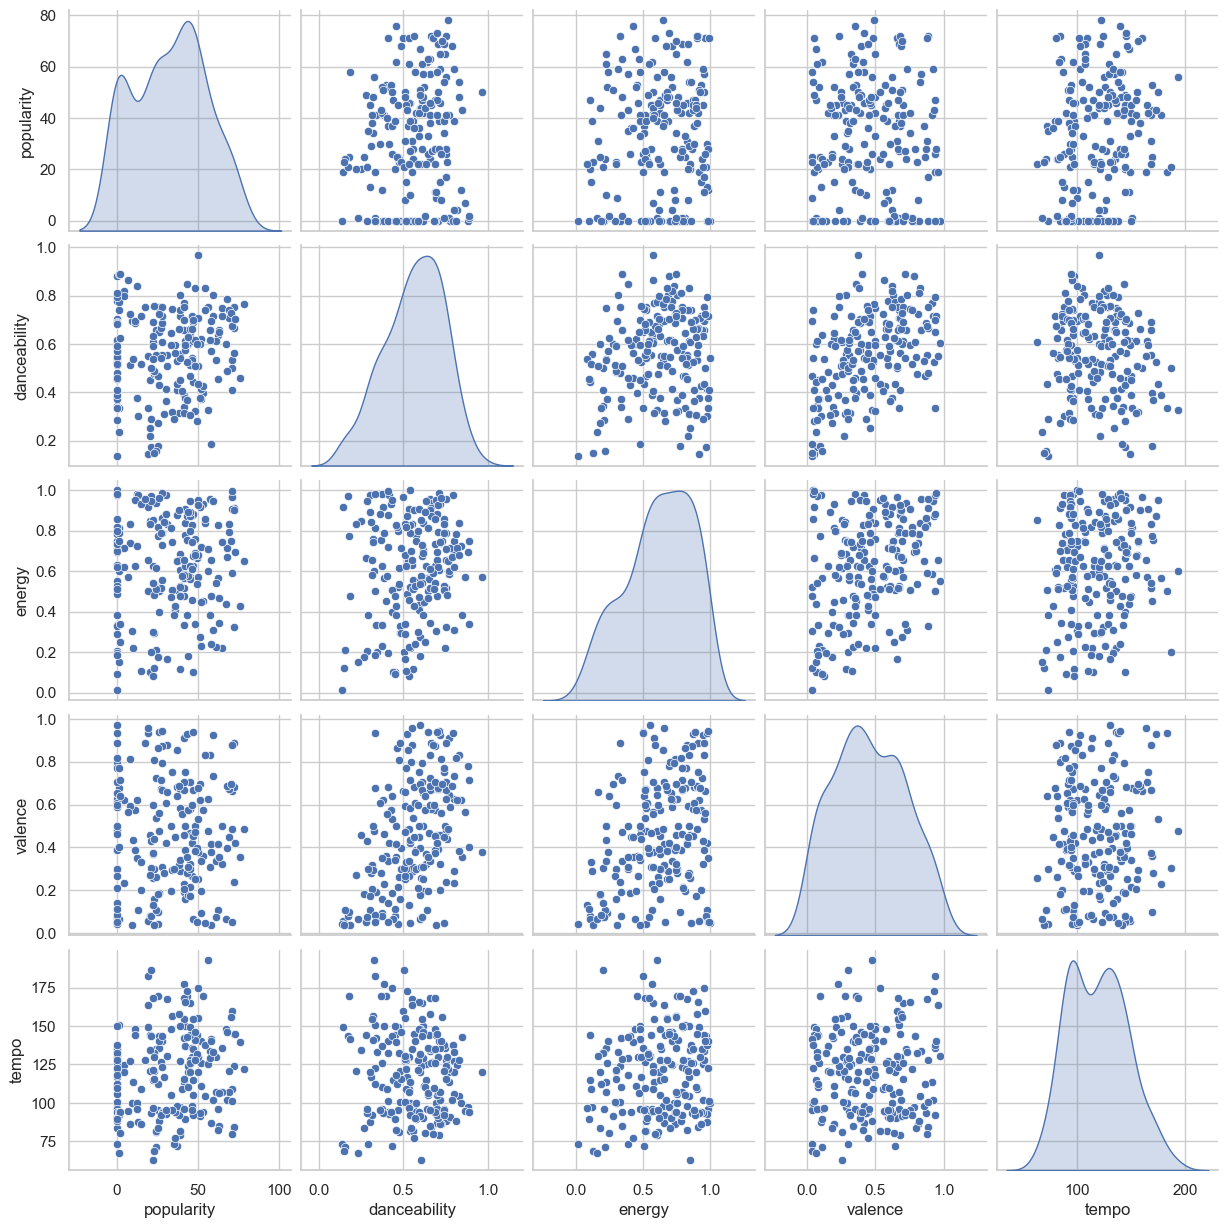

In [10]:

sample_df = df.sample(200)

variables_of_interest = ['popularity', 'danceability', 'energy', 'valence', 'tempo']
sns.pairplot(sample_df[variables_of_interest], diag_kind='kde')
plt.show()


## Data transformation

In [11]:
df.drop('Unnamed: 0', axis=1, inplace=True)